<p>Name:- Krishna Mundada<p>
<p>Roll No:- 45 </p>
<p>Batch:- E3</p>
<p>Practical 4</p>
<p>Topic:- AutoEncoders </p>
<hr>
<hr>

```Write a program to implement autoencoders for both binary and real inputs clearly show the loss after each iteration.```
<hr>


# Binary input

[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323  0.33367433]]
[[ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567  0.04575852 -0.18718385]
 [ 1.53277921  1.46935877  0.15494743  0.37816252]]
Iteration  0  Loss:  0.7330419200458681


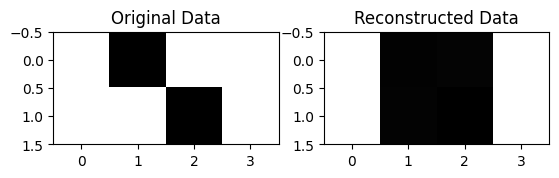


W1: 
 [[ 5.57870666 -1.93881993  5.93201472  7.21409795]
 [ 3.59980997 -3.32508599  2.23652077  3.70688972]
 [ 1.97918348  0.41942947  3.81088796  2.56923132]
 [ 4.57569204 -2.21730212  5.39713997  5.30687907]]
W2: 
 [[ 5.39075359e+00 -8.79338067e-02  8.01922083e-02  3.54019781e+00]
 [-2.04769295e+00 -3.50452522e-02  1.39304679e+00 -5.22733253e-03]
 [ 6.13729431e+00 -1.37915080e+00 -1.32921243e-01  4.14932387e+00]
 [ 5.45024279e+00  1.46736568e+00  2.83942289e-02  4.79855849e+00]]


Actual input: [[1 0 1 1]
 [1 1 0 1]]
Reconstructed input: [[0.99999996 0.49986643 0.50202303 0.99999623]
 [0.99999996 0.50006577 0.49411275 0.99999623]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) 

def binary_cross_entropy_derivative(y_true, y_pred):
    return -(y_true / y_pred) + (1 - y_true) / (1 - y_pred)

# Define the binary input data
X = np.array([[1,0,1,1],[1,1,0,1]])

# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 4
output_size = input_size
learning_rate = 0.01
num_iterations = 1000

# Initialize the weights randomly
np.random.seed(0)
w1 = np.random.randn(hidden_size, input_size)
w2 = np.random.randn(output_size, hidden_size)

print(w1)
print(w2)
# Training loop

for i in range(num_iterations):
    # Forward pass
    hidden_layer = sigmoid(np.dot(X,w1))
    output_layer = sigmoid(np.dot(hidden_layer,w2))
    
    # Calculate the loss
    # loss = np.mean((output_layer - X)**2)
    loss=binary_cross_entropy(X,output_layer)
    # print(f"Epoch {i}, Loss: {loss}")
    
    # Backward pass
    output_error = binary_cross_entropy_derivative(X, output_layer) * sigmoid_derivative(output_layer)
    hidden_error = np.dot(output_error,w2.T)*sigmoid_derivative(hidden_layer)
    
    # Update the weights
    w2 -= learning_rate*np.dot(hidden_layer.T,output_error)
    w1 -= learning_rate*np.dot(X.T,hidden_error)
    
    # Print the loss after every 1000 iterations
    if i % 1000 == 0:
        print("Iteration ", i, " Loss: ", loss)


reconstructed = sigmoid(np.dot(sigmoid(np.dot(X, w1)), w2))
# Plot the original and reconstructed data
plt.subplot(1,2,1)
plt.imshow(X, cmap='gray')
plt.title("Original Data")
plt.subplot(1,2,2)
plt.imshow(output_layer, cmap='gray')
plt.title("Reconstructed Data")
plt.show()

print()
print("W1: \n",w1)
print("W2: \n",w2)

print("\n\nActual input:", X)
print("Reconstructed input:", reconstructed)

# Real valued Input

Epoch 0, Loss: 303.6834611792738
Iteration  0  Loss:  303.6834611792738
Epoch 1, Loss: 32.47467849864457
Epoch 2, Loss: 20.445193134914998
Epoch 3, Loss: 15.361749188669613
Epoch 4, Loss: 12.199006568612234
Epoch 5, Loss: 10.042500125012745
Epoch 6, Loss: 8.484726850525659
Epoch 7, Loss: 7.312258204354308
Epoch 8, Loss: 6.402564563687291
Epoch 9, Loss: 5.680200320716598
Epoch 10, Loss: 5.0960317473610335
Epoch 11, Loss: 4.616562277793767
Epoch 12, Loss: 4.218080883722384
Epoch 13, Loss: 3.883277737725619
Epoch 14, Loss: 3.5991949733134554
Epoch 15, Loss: 3.355934659018431
Epoch 16, Loss: 3.1458138754222347
Epoch 17, Loss: 2.962793329278258
Epoch 18, Loss: 2.8020788288512537
Epoch 19, Loss: 2.659835388319691
Epoch 20, Loss: 2.5329769129662996
Epoch 21, Loss: 2.4190080782114483
Epoch 22, Loss: 2.3159032591381177
Epoch 23, Loss: 2.2220124486667356
Epoch 24, Loss: 2.1359872990886237
Epoch 25, Loss: 2.056722474438469
Epoch 26, Loss: 1.9833088489480633
Epoch 27, Loss: 1.9149959934222658
Epoc

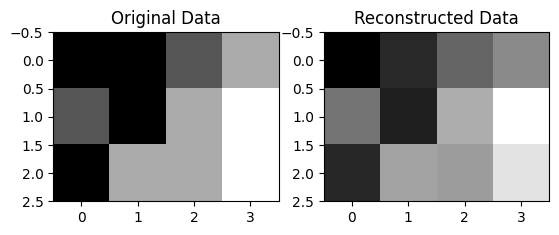


W1: 
 [[ 1.62408599  0.4500411   1.22114869  1.76319764]
 [ 1.27406033 -0.30524016 -0.29333366  0.26057586]
 [-0.60131109  0.7456799  -0.20389792  1.17507669]
 [ 0.1401914   0.35511372  0.15863943  0.03954192]]
W2: 
 [[ 6.63477248e-01 -2.03420261e-01  2.62849224e-01  1.29910275e-03]
 [-2.57522100e+00  1.20439301e-01  7.05853217e-01 -4.21400636e-01]
 [ 1.84305287e+00 -1.72426616e+00 -8.31016406e-02 -9.71733657e-02]
 [ 9.39972387e-01  6.51932561e-01 -7.70303846e-02  8.48939044e-01]]


Actual input: [[1 1 2 3]
 [2 1 3 4]
 [1 3 3 4]]
Reconstructed input: [[0.50545958 1.10648978 2.03425151 2.58145918]
 [2.249612   0.97048801 3.10749724 4.34316653]
 [1.09437567 2.96221797 2.84771433 3.91252164]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / len(y_true)


# Define the real-valued input data
X = np.array([[1,1,2,3],[2,1, 3, 4],[1,3,3,4]])

# Define the hyperparameters
input_size = X.shape[1]
hidden_size = 4
output_size = input_size
learning_rate = 0.001
num_iterations = 500

# Initialize the weights randomly
np.random.seed(0)
w1 = np.random.randn(hidden_size, input_size)
w2 = np.random.randn(output_size, hidden_size)

# Training loop
for i in range(num_iterations):
    # Forward pass
    hidden_layer = linear(np.dot(X, w1))
    output_layer = linear(np.dot(hidden_layer, w2))
    
    # Calculate the loss
    loss = mse(X, output_layer)
    print(f"Epoch {i}, Loss: {loss}")
    
    # Backward pass
    output_error = mse_derivative(X, output_layer) * linear_derivative(output_layer)
    hidden_error = np.dot(output_error, w2.T) * linear_derivative(hidden_layer)
    
    # Update the weights
    w2 -= learning_rate*np.dot(hidden_layer.T,output_error)
    w1 -= learning_rate*np.dot(X.T,hidden_error)
    
    # Print the loss after every 1000 iterations
    if i % 1000 == 0:
        print("Iteration ", i, " Loss: ", loss)

# Plot the original and reconstructed data
plt.subplot(1,2,1)
plt.imshow(X, cmap='gray')
plt.title("Original Data")
plt.subplot(1,2,2)
plt.imshow(output_layer, cmap='gray')
plt.title("Reconstructed Data")
plt.show()


# output 
reconstructed = linear(np.dot(linear(np.dot(X, w1)), w2))
print()
print("W1: \n",w1)
print("W2: \n",w2)

print("\n\nActual input:", X)
print("Reconstructed input:", reconstructed)
